In [1]:
import string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
import re

def replace_urls(in_string, replacement=None):
   
    replacement = '<-URL->' if replacement is None else replacement
    pattern = re.compile('(https?://)?(\w*[.]\w+)+([/?=&]+\w+)*')
    return re.sub(pattern, replacement, in_string)


def tokenize_and_stem(doc):
    
    #split into words
    tokens = word_tokenize(doc)
    
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # remove words shorter than 4 char
    tokens = [word for word in tokens if len(word)>3]
    # handle URLS
    tokens = [replace_urls(w) for w in tokens]
    
    # stemming of words
    porter = PorterStemmer()
    tokens = [porter.stem(word) for word in tokens]

    return tokens

In [2]:
from pymongo import MongoClient
import gensim 
import pandas as pd  
import numpy as np 


client = MongoClient('localhost', 27017)
db = client['']

tweets = pd.DataFrame(list(db[''].find()))

data = pd.DataFrame(columns=['Tweets'])
data['Tweets'] = tweets['text']
data['Id'] = tweets['_id']
data['len']  = np.array([len(tweet) for tweet in data['Tweets']])
user = list()
for i in range(0,len(tweets)):
    user.append(tweets['user'][i]['name'])
data['user'] = np.array(user)

In [3]:
docs = data['Tweets']

documents = [tokenize_and_stem(s) for s in docs]

In [8]:
print(documents[:1])

[['ciao', 'ragazzi', 'dopo', 'tanto', 'tempo', 'torno', 'fort', 'inizieremo', 'questo', 'week', 'postar', 'pronostici', 'vincer', 'presto', 'mister']]


In [9]:
#train model

In [6]:
from gensim.models.word2vec import Word2Vec

# build vocabulary and train model
model = gensim.models.Word2Vec(
        documents,
        size=300,
        window=2,
        min_count=2,
        workers=10)

model.train(documents, total_examples=len(documents), epochs=10)

(1715991, 2149080)

In [10]:
model.save("w2v.model")
print("Model Saved")

Model Saved


In [12]:
print(model)

Word2Vec(vocab=16267, size=300, alpha=0.025)


In [13]:
X = model[model.wv.vocab]

/media/alessandro/storage/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [15]:
#Kmeans

Counter({0: 9621, 4: 3928, 1: 1449, 3: 618, 5: 480, 2: 171})
silhouette score:  0.47550616


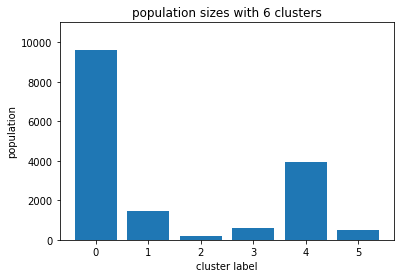

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import collections
 
k=6

kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
  
silhouette_score = silhouette_score(X, labels, metric='euclidean')

plt.bar(range(len(set(labels))), np.bincount(labels))

plt.ylabel('population')
plt.xlabel('cluster label')
plt.title('population sizes with {} clusters'.format(k));

# truncate y axis to see the rest better
plt.ylim(0,11000);

print (collections.Counter(labels))
print ('silhouette score: ', silhouette_score)